In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('vgsales.csv')

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


0         3.77
1         6.81
2         3.79
3         3.28
4        10.22
         ...  
16593     0.00
16594     0.00
16595     0.00
16596     0.00
16597     0.00
Name: JP_Sales, Length: 16598, dtype: float64


Text(0, 0.5, 'Колличество игр')

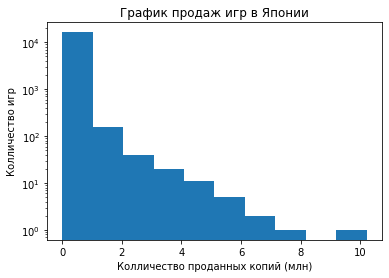

In [26]:
# Задача 1
series = df['JP_Sales']

print(series)

plt.hist(series, log=True)
plt.title('График продаж игр в Японии')
plt.xlabel('Колличество проданных копий (млн)')
plt.ylabel('Колличество игр')

Text(0, 0.5, 'Общая сумма продаж в мире')

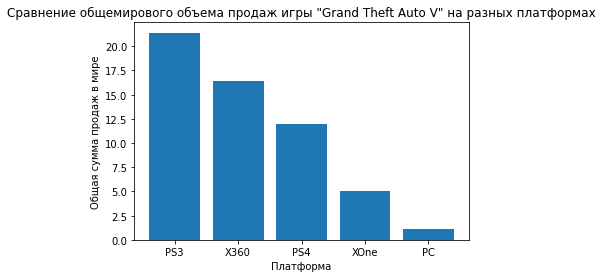

In [8]:
# Задача 2
df_1 = df[df['Name'] == 'Grand Theft Auto V']

plt.bar(df_1['Platform'], df_1['Global_Sales'])

plt.title('Сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах')
plt.xlabel('Платформа')
plt.ylabel('Общая сумма продаж в мире')

Text(0, 0.5, 'Количество продаж (млн)')

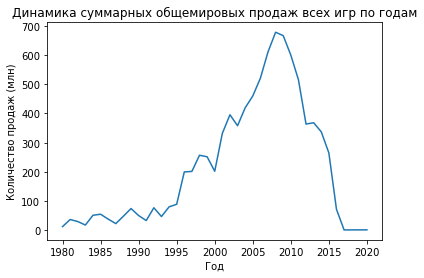

In [21]:
# Задача 3
series_2 = df.groupby('Year')['Global_Sales'].agg(np.sum)

plt.plot(series_2)
plt.title('Динамика суммарных общемировых продаж всех игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн)')

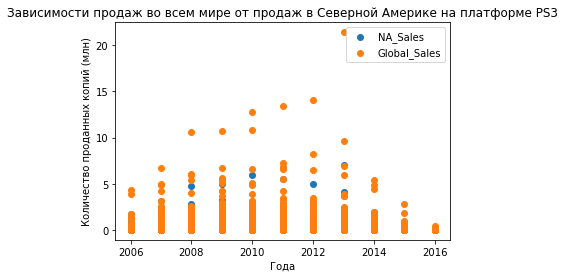

In [34]:
# Задача 4
df0 = df[df['Platform'] == 'PS3']
plt.scatter(df0['Year'], df0['NA_Sales'], label='NA_Sales')

df0 = df[df['Platform'] == 'PS3']
plt.scatter(df0['Year'], df0['Global_Sales'], label='Global_Sales')

plt.title('Зависимости продаж во всем мире от продаж в Северной Америке на платформе PS3')
plt.xlabel('Года')
plt.ylabel('Количество проданных копий (млн)')

plt.legend()

Platform
GB      5.07
NES    40.24
Name: Global_Sales, dtype: float64


Text(0.5, 1.0, 'Соотношение продаж игры "Super Mario Bros." на разных платформах во всем мире')

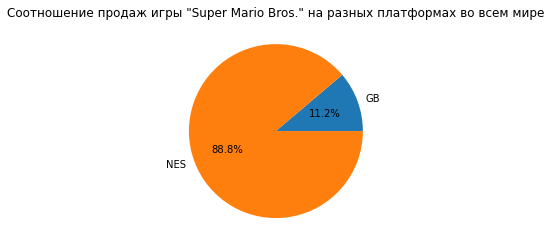

In [10]:
# Задача 5
df_2 = df[df['Name'] == 'Super Mario Bros.'].groupby('Platform').agg('sum')['Global_Sales']

print(df_2)

plt.pie(df_2, labels=df_2.index, autopct='%1.1f%%')

plt.title('Соотношение продаж игры "Super Mario Bros." на разных платформах во всем мире')

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

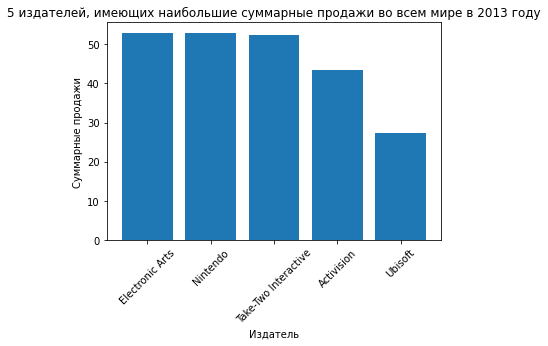

In [83]:
# Задача 6
df_3 = df[df['Year'] == 2013]

df1 = df_3.groupby('Publisher').agg('sum').sort_values('Global_Sales', ascending=False).head()

plt.bar(df1.index, df1['Global_Sales'])

plt.title('5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году')
plt.xlabel('Издатель')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)

15       2010.0
16       2013.0
17       2004.0
23       2013.0
24       2002.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 13490, dtype: float64


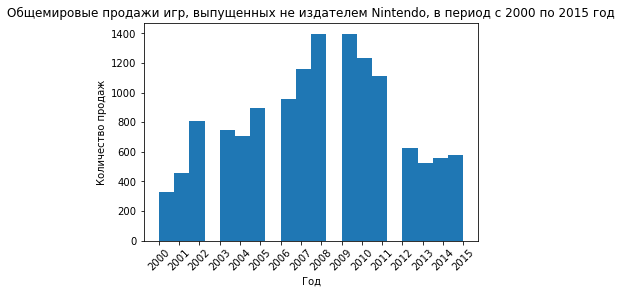

In [3]:
# Задача 7
df_4 = df[(df['Publisher'] != 'Nintendo') & (df['Year'] >= 2000) & (df['Year'] <= 2015)]['Year']

bin_width = [i + 1 for i in range(1999, 2015)]

plt.hist(df_4, bins=20)
plt.title('Общемировые продажи игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

plt.xticks(bin_width, rotation=45)

print(df_4)

Text(0, 0.5, 'Суммарные продажи')

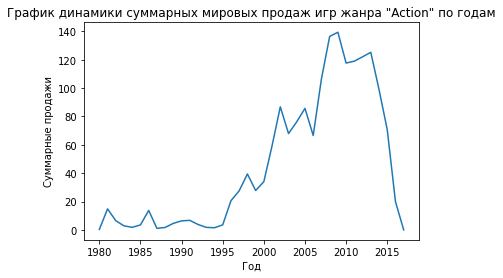

In [60]:
# Задача 8
df_5 = df[df['Genre'] == 'Action']

df_5 = df_5.groupby('Year').agg('sum')['Global_Sales']

plt.plot(df_5)
plt.title('График динамики суммарных мировых продаж игр жанра "Action" по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')

                Rank     Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Genre                                                                      
Shooter        84729  56223.0     64.65     22.79      0.88         7.12   
Misc          227236  68272.0     30.61     12.25      0.44         3.71   
Racing         88382  44167.0     16.83     13.13      0.43         2.72   
Role-Playing   71372  32120.0     12.79      5.55      0.59         1.64   
Sports         90675  34078.0      9.69      3.78      0.21         0.95   
Action        133864  42151.0      8.09      3.16      0.38         0.81   
Simulation    143889  36090.0      7.10      4.51      0.05         0.81   
Strategy      201609  36101.0      1.81      1.94      0.04         0.51   
Fighting       39060  10022.0      1.68      0.45      0.24         0.09   
Adventure      11946   6019.0      1.09      0.44      0.00         0.08   
Platform       55148  12030.0      0.94      0.59      0.00         0.12   
Puzzle      

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

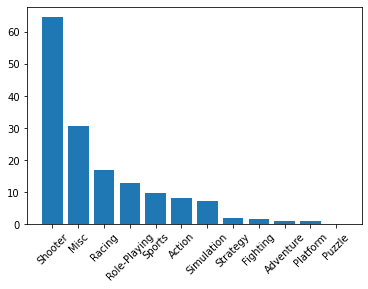

In [98]:
# Задача 9
df_6 = df[df['Publisher'] == 'Microsoft Game Studios']

df_6 = df_6.groupby('Genre').agg('sum').sort_values('NA_Sales', ascending=False)

plt.bar(df_6.index, df_6['NA_Sales'])

plt.title('Объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж (млн)')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Процент записей в датасете, ошибку суммирования продаж')

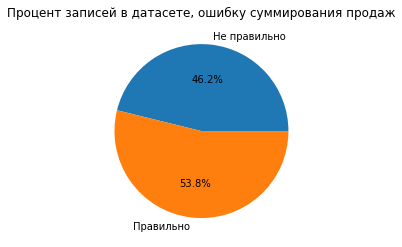

In [4]:
# Задача 10
df_7 = df

df_7['sum'] = df_7['NA_Sales'] + df_7['EU_Sales'] + df_7['JP_Sales'] + df_7['Other_Sales']

df_7['failed'] = np.where((df_7['sum'] > df_7['Global_Sales']) | (df_7['sum'] < df_7['Global_Sales']), 'Правильно', 'Не правильно')

series_7 = df_7.groupby('failed').agg('sum')['sum']

plt.pie(series_7, labels=series_7.index, autopct='%1.1f%%')
plt.title('Процент записей в датасете, ошибку суммирования продаж')